<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Shallow_CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: MNIST from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: Fully Connected And Convolution
    Optimizer:SGD with 0.01
    Results: 96 to 98 % Accurate
    Total Parameters : 250890 Less than the FC_mnist
    Total Convolution Layer : 1
```
#### Done by shriarul643@gmail.com

Import all necessary Packages all 


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import  mnist
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import numpy as np  
from matplotlib import  pyplot as plt

Load the mnist data from the Keras

In [ ]:
(trainData,trainLabel),(testData,testLabel) = mnist.load_data()
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


PreProcessing the data.</br>
Reshape to (28,28,1) in order to get a 3-d input to CNN.</br>
Transform Label into Binaries of the format [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] </br>

In [ ]:
trainData = img_to_array(trainData).reshape(trainData.shape[0],28,28,1)
testData = img_to_array(testData).reshape(testData.shape[0],28,28,1)

le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

Construct a CNN model with :</br>
INPUT => CONV => RELU => FC as the architecture of the CNN

In [ ]:
model = Sequential([Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)),
                    Activation('relu'),
                    Flatten(),
                    Dense(10,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


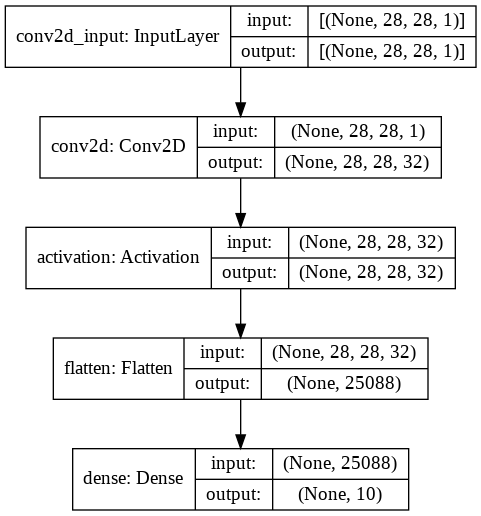

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
H = model.fit(trainData,trainLabel,batch_size=128,epochs=25,validation_data=(testData,testLabel))

Epoch 1/25
469/469 [==============================] - 4s 4ms/step - loss: 20.5520 - accuracy: 0.8431 - val_loss: 0.2510 - val_accuracy: 0.9259
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1266 - accuracy: 0.9627 - val_loss: 0.1299 - val_accuracy: 0.9606
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1002 - accuracy: 0.9687 - val_loss: 0.1183 - val_accuracy: 0.9615
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9743 - val_loss: 0.1159 - val_accuracy: 0.9649
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0788 - accuracy: 0.9757 - val_loss: 0.1072 - val_accuracy: 0.9695
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0709 - accuracy: 0.9774 - val_loss: 0.1254 - val_accuracy: 0.9633
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0628 - accuracy: 0.9794 - val_loss: 0.1191 - val_accuracy: 0.9663
Epoch

In [ ]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9665
Accuracy is 96.65%


In [ ]:
plt.style.use('ggplot')

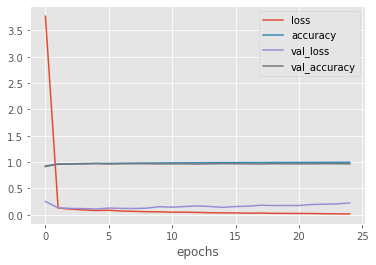

In [ ]:
plt.figure()
plt.plot(np.arange(0,25),H.history['loss'],label='loss')
plt.plot(np.arange(0,25),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,25),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,25),H.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
predicted = model.predict(testData)

In [ ]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.98      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



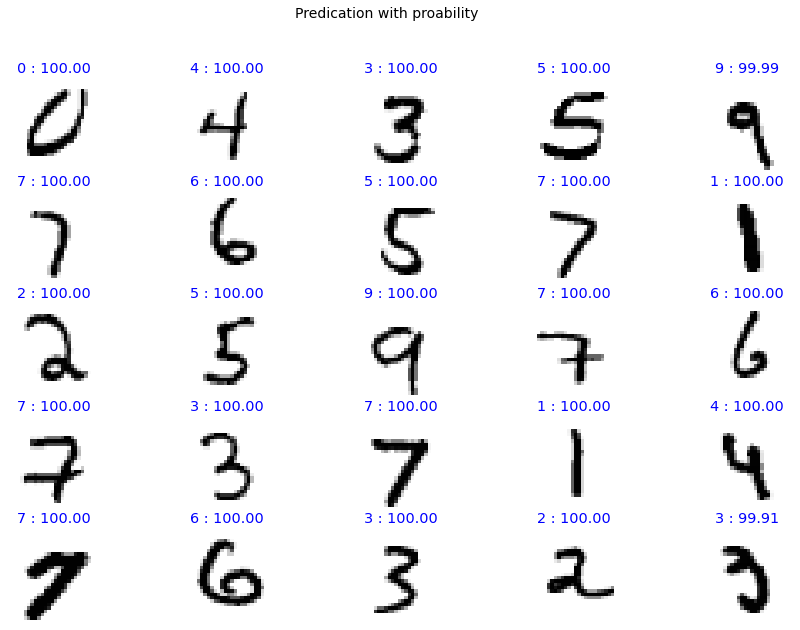

In [ ]:
RandomIndex = np.random.randint(0,len(testData),size=(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(28,28),cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = np.argmax(predicted[j])
  actualLabel = np.argmax(testLabel[j])
  if predictedLabel == actualLabel:
    color = 'blue'
  else :
    color = 'red'
  plt.title('{} : {:.2f}'.format(predictedLabel,predicted[j].max()*100),color=color)
plt.suptitle('Predication with proability',fontsize=14)
plt.show()